# Look at isothermal displacements in the Gulf Stream area

This is a first exploration.
We focus on the global domain.


In [1]:
# import libraries

%matplotlib inline
from glob import glob
from netCDF4 import Dataset
#import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import gsw

from utils import *

# load grid info
grd = grid()

# output files
ofiles = sorted(glob(grd._datadir+'*avg*.nc'))
ofile = ofiles[0]

1 grid file found, uses: /home/datawork-lops-osi/jgula/NESED/nesea_grd.nc
dim lon_rho: 1602  2002
lon_rho min= -7.212308e+01, max=-5.827296e+01
lat_rho min= 3.412333e+01, max=4.373431e+01
h min= 2.000000e+01, max=5.543070e+03
vertical grid parameters found in /home/datawork-lops-osi/jgula/NESED/nesed_avg.00240.nc


---

## isothermal displacements

To warm up we first look at isothermal displacements

---

In [2]:
# load temperature
T = Dataset(ofile)['temp']
print T

<type 'netCDF4._netCDF4.Variable'>
float32 temp(time, s_rho, eta_rho, xi_rho)
    long_name: averaged potential temperature
    units: Celsius
    field: temperature, scalar, series
    standard_name: sea_water_potential_temperature
    coordinates: lat_rho lon_rho
unlimited dimensions: time
current shape = (20, 50, 1602, 2002)
filling off



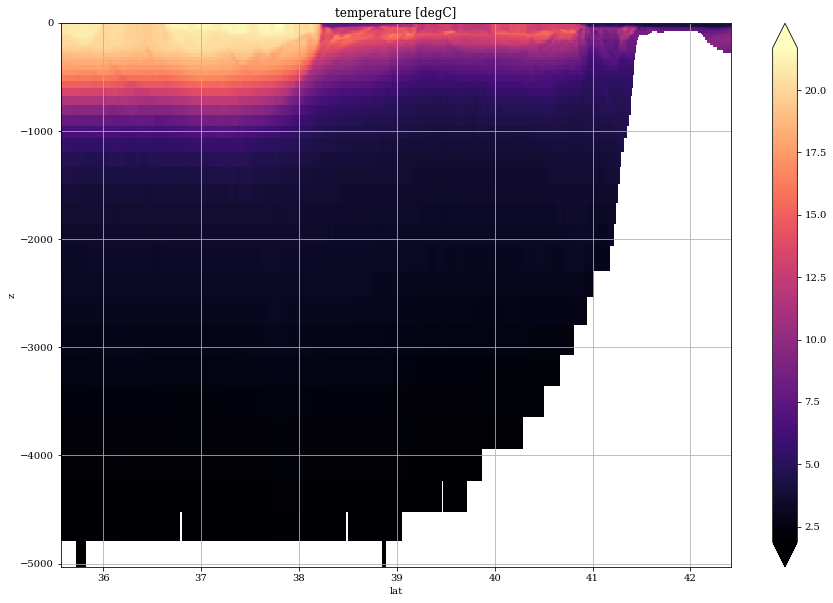

In [3]:
# interpolate on now a horizontally uniform grid

it = 0
ilon = grd.Lp/2  # used for vertical slices
lon = grd.lon_rho[None,:,ilon]
lat = grd.lat_rho[None,:,ilon]
h = grd.h[None,:,ilon]
zeta = Dataset(ofile)['zeta'][:][[it],:,ilon]
z = grd.get_z(zeta,h,grd.sc_r[:,None],grd.Cs_r[:,None])
#
ilat=0
z_uni = z[:,ilat,None]
T_uni = interp2z0(z_uni, z[:,:,None], T[it,:,:,[ilon]])[:,:,0]


plt.figure(figsize=(15,10))
ax=plt.subplot(111)
toplt = T_uni
cmap = plt.get_cmap('magma')
im = ax.pcolormesh(lat,z_uni,toplt,cmap=cmap)
cbar = plt.colorbar(im, format='%.1f', extend='both')
ax.set_xlabel('lat')
ax.set_ylabel('z')
ax.set_title('temperature [degC]')
ax.grid(True)


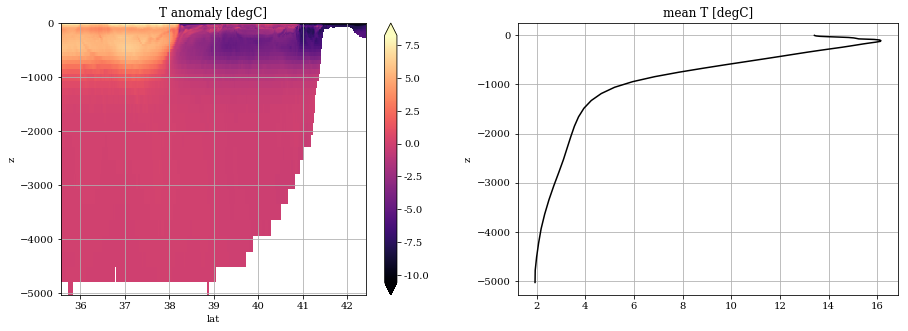

In [4]:
# compute the reference thermal stratifcation
T_mean = np.nanmean(T_uni,axis=1,keepdims=True)

plt.figure(figsize=(15,5))
ax=plt.subplot(121)
toplt = T_uni-T_mean
im = ax.pcolormesh(lat,z_uni,toplt,cmap=cmap)
cbar = plt.colorbar(im, format='%.1f', extend='both')
ax.set_xlabel('lat')
ax.set_ylabel('z')
ax.set_title('T anomaly [degC]')
ax.grid(True)

ax=plt.subplot(122)
ax.plot(T_mean,z_uni,'k')
ax.set_ylabel('z')
ax.set_title('mean T [degC]')
ax.grid(True)

/home1/homedir5/perso/aponte/.miniconda2/envs/cognac/lib/python2.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':


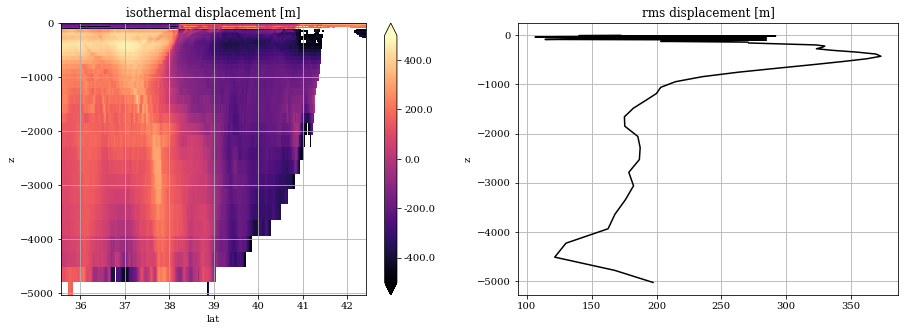

In [5]:
# compute the isothermal displacement
dTdz = np.diff(T_mean,axis=0)/np.diff(z_uni,axis=0)
dTdz = np.vstack((dTdz[0],dTdz,dTdz[-1]))
dTdz = .5*(dTdz[:-1]+dTdz[1:])

eta = (T_uni-T_mean)/dTdz


plt.figure(figsize=(15,5))
ax=plt.subplot(121)
toplt = eta
toplt[np.where(np.abs(toplt)>500)]=np.NaN
im = ax.pcolormesh(lat,z_uni,toplt,cmap=cmap)
cbar = plt.colorbar(im, format='%.1f', extend='both')
ax.set_xlabel('lat')
ax.set_ylabel('z')
ax.set_title('isothermal displacement [m]')
ax.grid(True)

ax=plt.subplot(122)
ax.plot(np.nanstd(eta,axis=1),z_uni,'k')
#ax.plot(dTdz,z_uni,'k')
ax.set_ylabel('z')
ax.set_title('rms displacement [m]')
ax.grid(True)

---

---

---